# Artificial Neural Network Multilayer Perceptrion (ANN MLP)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv(
    'cleaned_smart_bin_data.csv'
)

# Save bin_id separately
bin_ids = df['bin_id']

# Drop bin_id and label from features
X = df.drop(['bin_id', 'priority_label'], axis=1)

# Binary target: 1 = important (High), 0 = not important
y = (df['priority_label'] == 2).astype(int)


In [3]:
X_train, X_test, y_train, y_test, bin_id_train, bin_id_test = train_test_split(
    X, y, bin_ids,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [4]:
#feature scaling (important for ANN)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
mlp = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    alpha=0.001,
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(16, 8), max_iter=500,
              random_state=42)

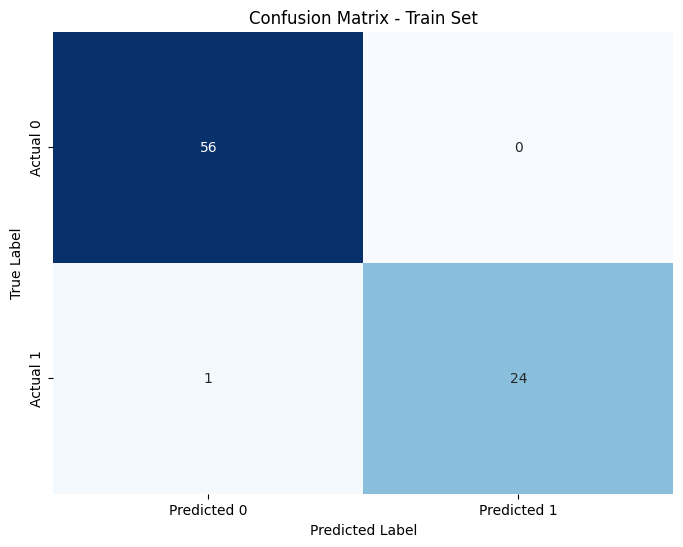

In [6]:
y_train_pred = mlp.predict(X_train_scaled)
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Train Set')
plt.show()

In [7]:
#model evaluation
y_pred = mlp.predict(X_test_scaled)

print("ANN Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ANN Accuracy: 0.9166666666666666
[[24  1]
 [ 2  9]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.90      0.82      0.86        11

    accuracy                           0.92        36
   macro avg       0.91      0.89      0.90        36
weighted avg       0.92      0.92      0.92        36



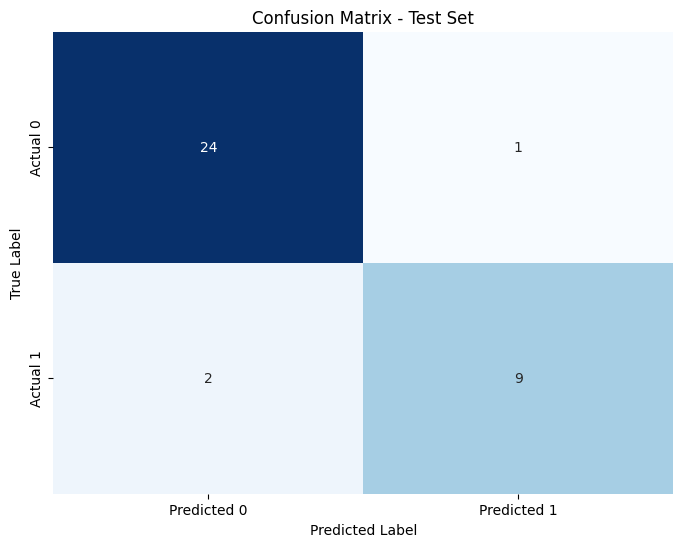

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [9]:
# Probability of HIGH priority (class 1)
scores = mlp.predict_proba(X_test_scaled)[:, 1]


In [10]:
#print top 10 bins with highest priority
results = X_test.copy()
results['bin_id'] = bin_id_test.values
results['priority'] = y_pred
results['score'] = scores

top_10_ann = results.sort_values(
    by='score',
    ascending=False
).head(10)

print(top_10_ann[['bin_id', 'priority', 'score']])


      bin_id  priority     score
78   BIN-131         1  0.999507
94   BIN-147         1  0.999388
2    BIN-003         1  0.998638
25   BIN-026         1  0.998451
43   BIN-045         1  0.998415
81   BIN-134         1  0.997130
30   BIN-031         1  0.994456
23   BIN-024         1  0.972339
54   BIN-107         1  0.684713
113  BIN-216         1  0.634910
